## WebScraper.io Chrome Extension 
I used WebScraper.io Chrome Extension to scrape historical data from Twitter.

#### Step 1: 
Install the Web Scraper Chrome Extension

#### Step 2: 
Create a sitemap for twitter
right-click on a page > inspect > developer tools console > Web Scraper tab > Create new sitemap > Import sitemap > paste the JSON in the Sitemap JSON box. Give your sitemap a name.
I found the JSON to create a sitemap for twitter on github: https://gist.github.com/scrapehero/d0305d8d15b0e447dcefdf548a9846e9 

#### Step 3: 
Setup the search terms and filters on Twitter's Advanced Search page:
https://twitter.com/search-advanced?lang=en
For this project, I searched for the following hashtags: #vision_2030 OR #السعودية_2030 OR #رؤية_2030

#### Step 4:
In the Web Scraper toolbar, click on the Sitemap > select the "Edit metadata" option and paste the URL of the twitter advanced search page > go to the Sitemap and click Scrape from the drop down > 
A new instance of chrome will launch, enabling the browser to scroll and automatically grab data. Once the scrape is complete, the browser would close by itself

#### Step 5:
Download the data
go to the Sitemap drop down > Export as CSV > Download Now 
A CSV file would soon be downloaded with all the scraped data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('vision_2030_tweets.csv')

In [3]:
df.head()

,web-scraper-order,web-scraper-start-url,handle,name,content,replies,retweets,favorites,unix_timestamp,published_date,url
0,1555502361-419,https://twitter.com/search?l=&q=%23vision_2030...,@byoriiiii,عبـــيـــر ➰,Uparking system \nنظام يهدف الى التقليل من الا...,2,1,3,1.554990e+12,4/11/2019 7:25,/byoriiiii/status/1116346598903226368
1,1555502361-591,https://twitter.com/search?l=&q=%23vision_2030...,@Middleeast_code,YAZID MESSAOUDI,KSA’s #Vision_2030 : ...,1,NaN,4,1.540940e+12,10/30/2018 16:24,/Middleeast_code/status/1057412951899062272
2,1555502361-895,https://twitter.com/search?l=&q=%23vision_2030...,@SaadAlmubaarak,Saad Almubarak,That’s my man !! #مشروع_نيوم #القديه #مبادرة...,NaN,NaN,NaN,1.508850e+12,10/24/2017 4:55,/SaadAlmubaarak/status/922793692380979201
3,1555502361-425,https://twitter.com/search?l=&q=%23vision_2030...,@ktdVWY5ykjEGJeJ,وطن,*الرئيس التنفيذي لميناء الملك عبدالله الأستاذ ...,NaN,NaN,1,1.554910e+12,4/10/2019 8:14,/ktdVWY5ykjEGJeJ/status/1115996411496153090
4,1555502361-1156,https://twitter.com/search?l=&q=%23vision_2030...,@AboShla5Libraly,أبو شلاخ الليبرالي,عبدالعزيز بن خالد الفالح\nابن معالي وزير الطاق...,506,1.9K,254,1.477400e+12,10/25/2016 6:18,/AboShla5Libraly/status/790905364124471296


In [4]:
df.shape

(1006, 11)

# Preprocessing

### drop un-needed columns

In [5]:
df.drop(["web-scraper-order","web-scraper-start-url","unix_timestamp","url"],axis=1,inplace=True)

In [6]:
new = df.published_date.str.split(' ',expand=True)

df['date']=new[0]
df['time']=new[1]

df.drop(['published_date'],axis=1,inplace=True)

### Missing Values

In [7]:
df.content.isnull().sum()

1

In [8]:
df[df.content.isnull()]

,handle,name,content,replies,retweets,favorites,date,time
541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.drop([541],axis=0,inplace=True)

In [10]:
df.replace(np.nan,0,inplace=True)

### Check for duplicate tweets

In [11]:
len(df.drop_duplicates()) 

1005

There are no duplicate tweets

## DataTypes

In [12]:
def change(n):
    if n == 0 :
        return n
    
    if n[-1] == "K":
        return int(float(n[:-1])*1000)
    else:
        return int(n)

df.replies = [change(n) for n in df.replies]
df.retweets = [change(n) for n in df.retweets]
df.favorites = [change(n) for n in df.favorites]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1005
Data columns (total 8 columns):
handle       1005 non-null object
name         1005 non-null object
content      1005 non-null object
replies      1005 non-null int64
retweets     1005 non-null int64
favorites    1005 non-null int64
date         1005 non-null object
time         1005 non-null object
dtypes: int64(3), object(5)
memory usage: 70.7+ KB


### Create a CSV file for Submission

In [14]:
df.to_csv("twitter_vision2030_dataset.csv",index=None,header=True)

### Kaggle Contribution: twitter_vision2030_dataset

https://www.kaggle.com/nourafull/twitter_vision2030_dataset

### Plotting

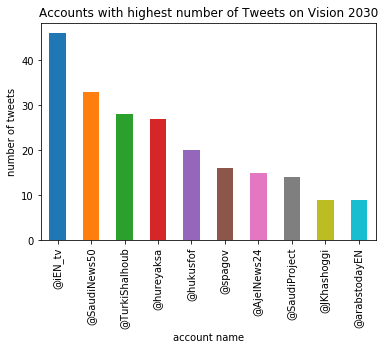

In [19]:
import matplotlib.pyplot as plt

df.groupby("handle").count()["name"].sort_values(ascending=False).iloc[:10].plot(kind="bar")
plt.xlabel("account name")
plt.ylabel("number of tweets")
plt.title("Accounts with highest number of Tweets on Vision 2030");

## Research Question
We will use this data to find the most common words that occur in Vision 2030 hashtags. 
We will analyse the number of favorites, and retweets to measure the popularity of some of the Vision 2030 initiatives.
We will do a Sentiment analysis to the tweets and replies to get an idea of the reactions to the Vision 2030 initiatives among the community.